Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf

In [4]:
  IMG_DIR='/content/drive/MyDrive/flowers/daisy'
  IMG_DIR1='/content/drive/MyDrive/flowers/dandelion'
  IMG_DIR2='/content/drive/MyDrive/flowers/rose'
  IMG_DIR3='/content/drive/MyDrive/flowers/sunflower'
  IMG_DIR4='/content/drive/MyDrive/flowers/tulip'

  def read_images(directory):
      for img in glob.glob(directory+"/*.jpg"):
          image = cv2.imread(img)
          resized_img = cv2.resize(image/255.0  , (150 , 150))

          yield resized_img

  resized_imgs0 =  np.array(list(read_images(IMG_DIR)))
  resized_imgs1 =  np.array(list(read_images(IMG_DIR1)))
  resized_imgs2 =  np.array(list(read_images(IMG_DIR2)))
  resized_imgs3 =  np.array(list(read_images(IMG_DIR3)))
  resized_imgs4 =  np.array(list(read_images(IMG_DIR4)))

In [5]:
resized_imgs0.shape

(769, 150, 150, 3)

In [6]:
resized_imgs1.shape

(1052, 150, 150, 3)

In [7]:
resized_imgs2.shape

(784, 150, 150, 3)

In [8]:
resized_imgs3.shape

(734, 150, 150, 3)

In [9]:
resized_imgs4.shape

(984, 150, 150, 3)

In [10]:
#creating labels

label0 = np.zeros((resized_imgs0.shape[0],1))  
label1 = np.ones((resized_imgs1.shape[0],1))  
label2 = np.ones((resized_imgs2.shape[0],1))*2 
label3 = np.ones((resized_imgs3.shape[0],1))*3 
label4 = np.ones((resized_imgs4.shape[0],1))*4

In [11]:
data = np.concatenate((resized_imgs0,resized_imgs1,resized_imgs2,resized_imgs3,resized_imgs4))

In [12]:
data.shape

(4323, 150, 150, 3)

In [13]:
data= data.reshape(data.shape[0], data.shape[1]*data.shape[2]*data.shape[3])

In [14]:
data.shape

(4323, 67500)

In [15]:
labels = np.concatenate((label0,label1,label2,label3,label4))

In [16]:
labels.shape

(4323, 1)

In [46]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.4, random_state=42)

In [47]:
train_data.shape

(2593, 67500)

In [48]:
train_labels.shape

(2593, 1)

In [49]:
test_data.shape

(1730, 67500)

In [50]:
test_labels.shape

(1730, 1)

In [22]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [23]:
one_hot_train_labels

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [51]:
train_data = np.array(train_data).reshape(len(train_data),150,150,3)

In [52]:
test_data = np.array(test_data).reshape(len(test_data),150,150,3)

In [53]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.2,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [54]:
data_gen.fit(train_data)

In [55]:
data_gen.fit(test_data)

In [56]:
#MOdels with COnv2D and Maxpooling
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [57]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate= 0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [58]:
  result = model.fit(
          x= train_data,
          y= train_labels,
          batch_size = 30,
          steps_per_epoch=30,
          epochs=100,
          validation_split=0.3,
          validation_steps=10,
          validation_batch_size=10)

Epoch 1/100
30/30 [==============================] - 48s 2s/step - loss: 1.5969 - accuracy: 0.2331 - val_loss: 1.5598 - val_accuracy: 0.3600
Epoch 2/100
30/30 [==============================] - 47s 2s/step - loss: 1.5740 - accuracy: 0.2429 - val_loss: 1.4770 - val_accuracy: 0.4300
Epoch 3/100
30/30 [==============================] - 46s 2s/step - loss: 1.5143 - accuracy: 0.3042 - val_loss: 1.4191 - val_accuracy: 0.4900
Epoch 4/100
30/30 [==============================] - 47s 2s/step - loss: 1.4886 - accuracy: 0.3427 - val_loss: 1.3697 - val_accuracy: 0.4900
Epoch 5/100
30/30 [==============================] - 48s 2s/step - loss: 1.4192 - accuracy: 0.3789 - val_loss: 1.3284 - val_accuracy: 0.4600
Epoch 6/100
30/30 [==============================] - 47s 2s/step - loss: 1.3346 - accuracy: 0.4274 - val_loss: 1.2143 - val_accuracy: 0.5200
Epoch 7/100
30/30 [==============================] - 46s 2s/step - loss: 1.2780 - accuracy: 0.4212 - val_loss: 1.1466 - val_accuracy: 0.5700
Epoch 8/100
3

In [59]:
model.evaluate(test_data,test_labels)

55/55 [==============================] - 22s 406ms/step - loss: 0.8883 - accuracy: 0.6642


[0.8882961273193359, 0.6641618609428406]

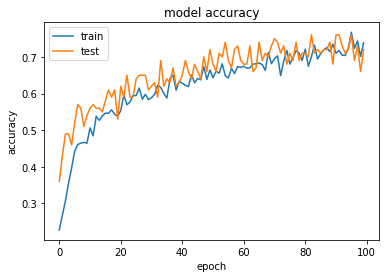

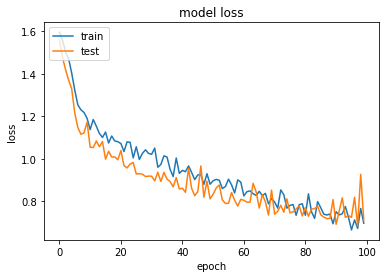

In [60]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
y_pred1 = model.predict(test_data)

In [62]:
np.argmax(y_pred1, axis=1)[0:30]

array([1, 3, 1, 2, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 1, 2, 0, 1,
       3, 4, 4, 0, 4, 1, 1, 2])

In [63]:
test_labels[0:30]

array([[1.],
       [1.],
       [1.],
       [4.],
       [2.],
       [4.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [4.],
       [3.],
       [1.],
       [4.],
       [1.],
       [4.],
       [1.],
       [4.],
       [2.],
       [0.],
       [0.],
       [3.],
       [4.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.]])